# MLP로 Iris 분류하기
by uramoon@kw.ac.kr
(<a href="https://raw.githubusercontent.com/ronreiter/interactive-tutorials/master/LICENSE">Apache 2.0 License</a>)

꽃받침 길이 (cm), 꽃받침 너비 (cm), 꽃잎 길이 (cm), 꽃잎 너비 (cm)로 Iris setosa, Iris versicolor, Iris virginica를 분류하는 MLP를 만들어 봅시다.

## 데이터셋 만들기
seaborn에서 제공하는 Iris 데이터셋을 사용합니다.<br>
seaborn은 데이터 시각화 도구입니다. (https://seaborn.pydata.org/)

In [1]:
# seaborn 라이브러리로 iris 데이터셋 DataFrame으로 읽어오기
import seaborn as sns
iris = sns.load_dataset("iris")

### 데이터셋 살펴보기

[*pandas*](http://pandas.pydata.org/)를 이용해 데이터를 처리합니다. pandas는 데이터 처리 및 분석에 사용되는 오픈소스 라이브러리입니다. <br>
iris는 pandas DataFrame으로 저장되어 있습니다.

In [2]:
# TODO: 무작위로 10개의 샘플을 확인해보세요.
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
144,6.7,3.3,5.7,2.5,virginica
11,4.8,3.4,1.6,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
78,6.0,2.9,4.5,1.5,versicolor
119,6.0,2.2,5.0,1.5,virginica
135,7.7,3.0,6.1,2.3,virginica
71,6.1,2.8,4.0,1.3,versicolor
37,4.9,3.6,1.4,0.1,setosa
31,5.4,3.4,1.5,0.4,setosa
117,7.7,3.8,6.7,2.2,virginica


데이터의 통계자료를 확인해봅시다.

In [3]:
# TODO: 통계자료를 확인해보세요. (일부 컬럼은 누락될 수 있습니다.)
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


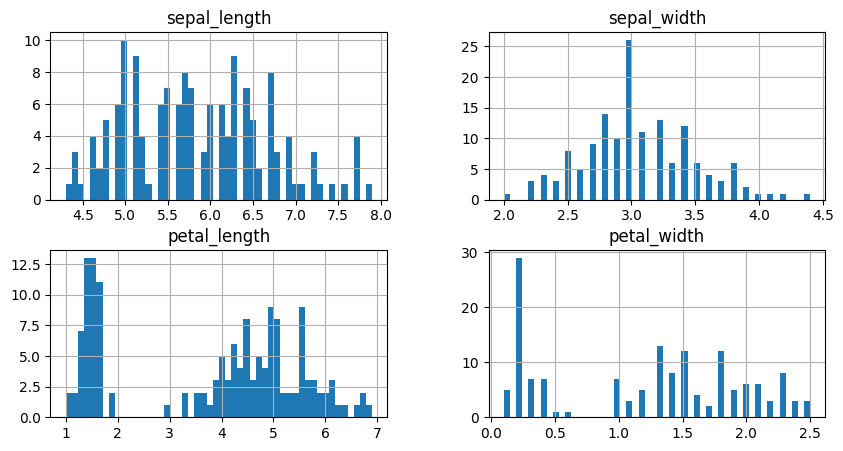

In [4]:
# 히스토그램 그리기

%matplotlib inline
import matplotlib.pyplot as plt
iris.hist(bins=50, figsize=(10,5))
plt.show()

In [5]:
# TODO: 각 컬럼의 데이터 타입과 null 값을 지닌 컬럼이 있는지 확인해보세요.
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


꽃받침(sepal)의 길이, 너비와 꽃잎(petal)의 길이, 너비로 어떤 꽃인지 예측할 것입니다.

In [6]:
# TODO: 어떤 꽃들이 있는지 알아봅시다.
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### 훈련 데이터, 검증 데이터, 테스트 데이터로 나누기
1. 훈련 데이터: 모델을 훈련할 때 직접적으로 사용
2. 검증 데이터: 모델을 훈련할 때 간접적으로 사용
3. 테스트 데이터: 훈련이 끝난 모델의 성능을 평가할 때 사용

일반적으로 훈련 (60%), 검증 (20%), 테스트 (20%)로 나눕니다. <br>
훈련 (80%), 테스트 (20%)로 나눈 후 훈련을 다시 훈련 (80%)과 검증 (20%)으로 나누기도 합니다.<br>

모두 같은 결과를 얻기 위해 train_test_split 함수에 random_state 42를 사용합니다.<br>
42는 '은하수를 여행하는 히치하이커를 위한 안내서'에 등장한 숫자인데 random seed로 종종 사용됩니다.

In [7]:
from sklearn.model_selection import train_test_split

# 훈련 (80%), 테스트 (20%)
train, test = train_test_split(iris, test_size=0.2, random_state=42)

In [8]:
# TODO: train과 test 샘플 수를 확인하세요.
print(len(train))
print(len(test))

120
30


## X값과 y값 나누기
지도 학습에서는 데이터 (X)와 답 (y)을 분리하여 모델에 넣어줍니다. X는 여러 값을 지닌 벡터라서 대문자로 표기하고, y는 하나의 값을 지녀 소문자로 표기합니다. (예: MNIST의 X는 784개의 픽셀 값, y는 [0, 9]에 속한 정수)

In [9]:
train_X = train.drop(['species'], axis=1)   # species 열(axis=1)만 제거
train_y = train['species']                  # species 열만 가져오기

# TODO
test_X = test.drop(['species'], axis=1)
test_y = test['species']  


In [10]:
train_X

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


### y값 숫자로 변환하기

인공 신경망에는 setosa, versicolor 등의 string이 입력될 수 없으므로 숫자로 변환해야 합니다.

In [11]:
# 현재의 y값 확인
train_y

22         setosa
15         setosa
65     versicolor
11         setosa
42         setosa
          ...    
71     versicolor
106     virginica
14         setosa
92     versicolor
102     virginica
Name: species, Length: 120, dtype: object

In [12]:
# LabelEncoder를 사용하여 string 형태의 레이블을 자동으로 변환하도록 설정
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_y)

LabelEncoder()

In [13]:
# 다음의 클래스들이 0, 1, 2로 맵핑됩니다.
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
# 훈련 레이블 숫자로 변환하기
train_y = le.transform(train_y)
train_y

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [15]:
# TODO: 테스트 레이블 숫자로 변환하기
le.fit(test_y)
test_y = le.transform(test_y)
test_y


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 전처리 하기
Min-max normalization으로 모든 인자의 값을 0과 1사이의 값으로 변환합니다. <br>(https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization))<br>
**(중요) 모든 전처리 기법은 훈련 데이터만 사용하여 학습한 후 다른 데이터 (검증 및 테스트)에 동일하게 적용합니다.**

In [16]:
# 현재 훈련 데이터에서 가장 작은 값과 큰 값을 확인합니다.
import numpy as np

print(train_X.min()) 
print(train_X.max())

sepal_length    4.3
sepal_width     2.0
petal_length    1.0
petal_width     0.1
dtype: float64
sepal_length    7.7
sepal_width     4.4
petal_length    6.7
petal_width     2.5
dtype: float64


In [17]:
# train_X의 min, max값으로 scaler를 설정합니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

MinMaxScaler()

In [18]:
# 0부터 1사이의 NumPy 배열로 변환
train_X = scaler.transform(train_X)

# TODO
test_X = scaler.transform(test_X)

In [19]:
# 잘 변환됐는지 확인

print(train_X.min()) 
print(train_X.max())

0.0
1.0


## 모델 만들기
MLP에서 숨겨진 층의 노드 개수는 입력층의 2/3 정도로 설정하는 것이 일반적이지만 최적이 아닐 수도 있으니 직접 실험을 해가며 설정하는 것이 좋습니다. 출력층의 활성화 함수는 출력 중 큰 값에 높은 확률을 할당해주는 함수를 사용합니다. (https://en.wikipedia.org/wiki/Softmax_function)

In [20]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Input(shape=(4,))) # 입력층의 모양
model.add(layers.Dense(16, activation='relu')) # 숨겨진 층, 원하는 경우 층을 추가하셔도 좋습니다.
model.add(layers.Dense(10, activation='softmax')) # 출력층의 모양 및 활성화 함수

In [21]:
# TODO: 컴파일하기
# 레이블에 one-hot 인코딩을 사용하지 않았으므로 loss에 주의합니다.

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 모델 훈련하기
훈련 데이터를 사용하여 인공신경망의 가중치를 조절합니다. 한 epoch이 끝나면 (훈련 데이터를 완전히 한 번 보고나면) 검증 데이터의 loss를 측정합니다. 훈련 데이터의 loss는 줄어드는데 검증 데이터의 loss가 증가하면 과적합이 일어나는 신호이므로 훈련을 중단합니다. 일시적인 현상에 콜백 함수가 속을 수 있으니 val_loss가 감소하지 않아도 10번의 epochs을 참을 수 있도록 설정해봅시다.


In [24]:
# TODO: 훈련 데이터와 정답으로 모델을 훈련합니다.

model.fit(train_X, train_y, epochs=10000, 
            callbacks=EarlyStopping(monitor='val_loss', patience=10),            # val_loss를 관찰하여 과적합이 일어나면 훈련을 중단합니다. (10번은 참기)
            validation_split=0.2)       # 훈련 데이터의 20%를 검증 데이터로 사용합니다.

Epoch 1/10000
3/3 [==============================] - 0s 44ms/step - loss: 0.1057 - accuracy: 0.9479 - val_loss: 0.1399 - val_accuracy: 1.0000
Epoch 2/10000
3/3 [==============================] - 0s 25ms/step - loss: 0.1035 - accuracy: 0.9479 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 3/10000
3/3 [==============================] - 0s 17ms/step - loss: 0.1031 - accuracy: 0.9583 - val_loss: 0.1395 - val_accuracy: 1.0000
Epoch 4/10000
3/3 [==============================] - 0s 17ms/step - loss: 0.1045 - accuracy: 0.9375 - val_loss: 0.1390 - val_accuracy: 1.0000
Epoch 5/10000
3/3 [==============================] - 0s 26ms/step - loss: 0.1031 - accuracy: 0.9583 - val_loss: 0.1402 - val_accuracy: 1.0000
Epoch 6/10000
3/3 [==============================] - 0s 20ms/step - loss: 0.1030 - accuracy: 0.9583 - val_loss: 0.1409 - val_accuracy: 1.0000
Epoch 7/10000
3/3 [==============================] - 0s 18ms/step - loss: 0.1039 - accuracy: 0.9375 - val_loss: 0.1397 - val_accuracy: 1.0000
Epoch 

## 테스트 데이터로 모델 평가하기

In [26]:
# TODO: 테스트 데이터와 정답으로 모델을 평가합니다.
# Hint: https://keras.io/api/models/model_training_apis/#evaluate-method
model.evaluate(test_X, test_y)

1/1 [==============================] - 0s 25ms/step - loss: 0.1022 - accuracy: 0.9667


[0.10223186761140823, 0.9666666388511658]

## 새로운 모델 만들어보기
테스트 데이터에서 96% 미만의 정확도가 나온 경우 모델 만들기부터 모든 것을 자유롭게 다시 수행하세요.